<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/master/Chapter06_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 Basic Statistical Analysis Code

A Jupyter notebook with code examples in R for _Chapter 6 (Data Analysis)_ of _Routlegde_ book titled **[How to Conduct Empirical Music Research](https://github.com/tuomaseerola/emr)** by [Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), [Music and Science Lab]() at [Durham University](https://www.durham.ac.uk) and [Music and Science Lab](https://musicscience.net) scheduled to be published in 2023.

To run the code in your browser, open the file in Colab (click the icon "Open in Colab"). Alternatively, you can download the notebook and run it locally.

File `Chapter06_basic.ipynb` | Version `10/9/2022` | [Back to Index](https://github.com/tuomaseerola/emr)

---

Run the block below first (click play button on the left corner). This activates the two very useful libraries for R (`tidyverse` and `ggplot2`) and install a library allowing to create plots with multiple sub-plots easily (`cowplot`). The last line install a specific library titled `MusicScienceData` for the book which contains example datasets.

In [3]:
library(tidyverse)
library(ggplot2)
#install.packages("cowplot")
library(cowplot)
options(repr.plot.width = 6, repr.plot.height = 4) # Default plot size for Colab
R.version.string

[1] "R version 3.6.0 (2019-04-26)"

In [5]:
devtools::install_github("tuomaseerola/MusicScienceData@main")
library(MusicScienceData)

✔  checking for file ‘/private/var/folders/b0/vtr2rd_96119zlr64t5hvlgr0000gp/T/RtmpfZkj2j/remotes150343945b58c/tuomaseerola-MusicScienceData-9f292fb/DESCRIPTION’ ...
─  preparing ‘MusicScienceData’:
✔  checking DESCRIPTION meta-information ...
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
     NB: this package now depends on R (>= 3.5.0)
─  building 'MusicScienceData_0.13.tar.gz'
   


### Ch6_Ex01.R
Create a scatterplot from an existing data concerning ratings of valence and energy in film music soundtracks (Eerola and Vuoskoski, 2011).

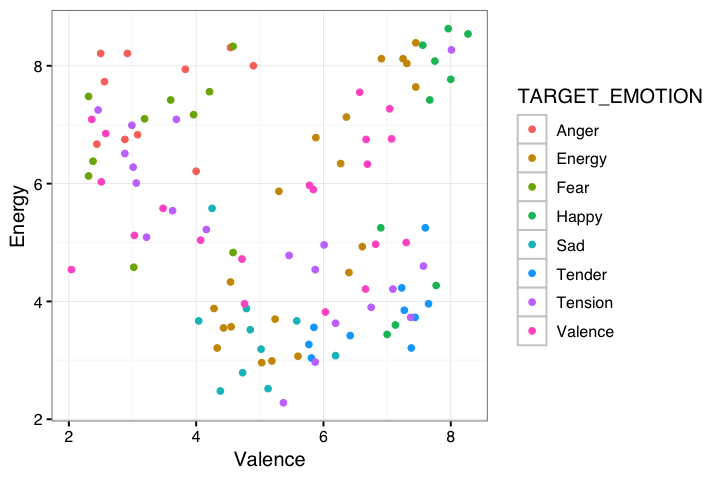

In [6]:
ggplot(MusicScienceData::soundtrack,    # defines the data
     aes(x=Valence,
     y=Energy,colour=TARGET_EMOTION))+  # variables
  geom_point()+                         # plots points
  theme_MusicScience()                  # applies style

### Ch6_Ex02.R
Create a histogram with an example question concerning attitudes to music and sadness (ASM question 25 from Eerola and Peltola, 2016).

Here we also assign the plot to an output variable (`g1`) to create a useful habit for more complex plots.

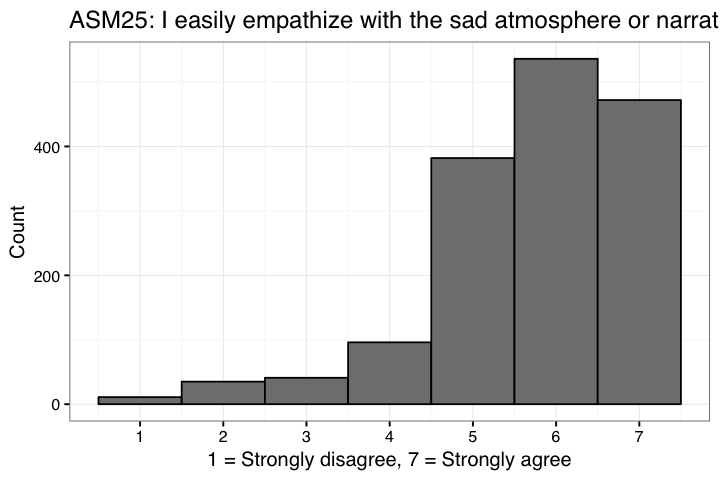

In [7]:
ex2 <- sadness %>% 
  drop_na(ASM25) %>%   # drop missing values 
  ggplot(aes(x = ASM25))+
  geom_histogram(bins=7,fill="grey50", colour='black')+
  scale_x_continuous(breaks = seq(1,7,by=1))+ 
  ggtitle(sadness_ASM_labels[25])+
  ylab('Count')+
  xlab('1 = Strongly disagree, 7 = Strongly agree')+
  theme_MusicScience()
print(ex2)

### Ch6_Ex03.R
Create four histograms with priming data involving positive and negative words and sound examples. The measure is reaction time responses (`RT`) and the data comes from a study by Armitage and Eerola (2020).

Warning message:
“Removed 2 rows containing missing values (geom_bar).”

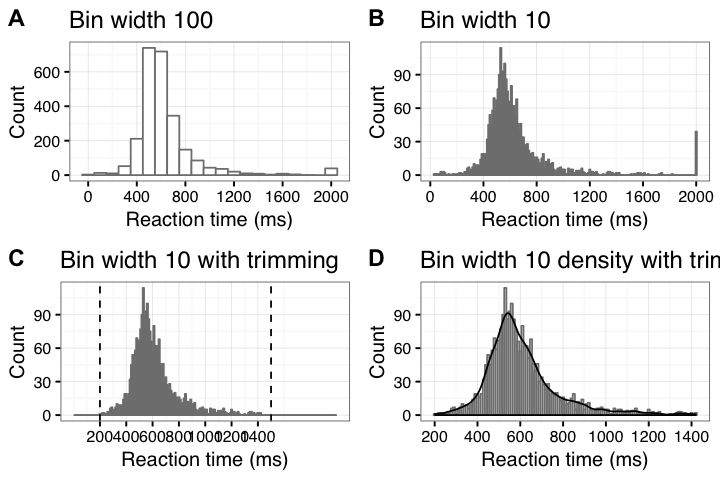

In [8]:
d <- MusicScienceData::priming

g1 <- ggplot(d,aes(x=RT))+
  geom_histogram(binwidth=100,colour='grey50',fill='white')+
  ggtitle('Bin width 100')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(0,2000,by=400))+
  theme_MusicScience()

g2 <- ggplot(d,aes(x=RT))+
  geom_histogram(binwidth=10,colour='grey50',fill='white')+
  ggtitle('Bin width 10')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(0,2000,by=400))+
  theme_MusicScience()

g3 <- ggplot(dplyr::filter(d,RT>200 & RT<1500),aes(x=RT))+
  geom_histogram(binwidth=10,colour='grey50',fill='white')+
  ggtitle('Bin width 10 with trimming')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(200,1500,by=200),limits = c(0,2000))+
  geom_vline(xintercept = c(200,1500),linetype='dashed')+
  theme_MusicScience()

g4 <- ggplot(dplyr::filter(d,RT>200 & RT<1500),aes(x=RT))+
  geom_histogram(binwidth=10,colour='grey50',fill='white')+
  geom_density(aes(y=10 * ..count..),alpha=0.5,colour='black',fill=NA)+
  ggtitle('Bin width 10 density with trimming')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(200,1500,by=200))+
  theme_MusicScience()

ex3 <- plot_grid(g1, g2, g3, g4, nrow = 2,labels="AUTO")
print(ex3)

### Ch6_Ex04.R
Create a boxplot with textual explanations with music and sadness data.

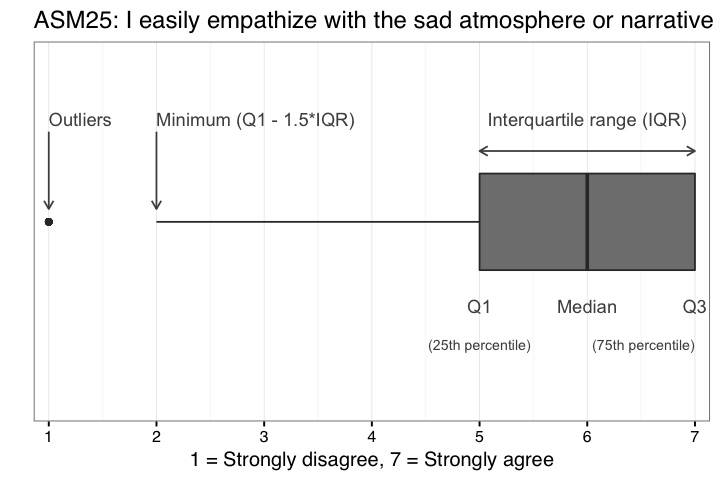

In [9]:
ex4 <- MusicScienceData::sadness %>% 
  drop_na(ASM25) %>%   # drop missing values 
  ggplot(aes(y = ASM25))+
  geom_boxplot(fill='gray50')+
  scale_y_continuous(breaks = seq(1,7,by=1),expand=c(0.02,0.02))+
  scale_x_discrete()+
  coord_flip()+
  annotate("segment",x=.55,xend=0.55,y=5,yend=7,arrow = arrow(ends = "both",length = unit(.2,"cm")),colour='gray30')+
  annotate("text",x=.8,y=6,label='Interquartile range (IQR)',hjust=0.5,colour="gray30")+
  annotate("text",x=.8,y=2,label='Minimum (Q1 - 1.5*IQR)',hjust=0,colour="gray30")+
  annotate("text",x=-.65,y=6,label='Median',hjust=0.5,colour="gray30")+
  annotate("text",x=-.65,y=5,label='Q1',hjust=0.5,colour="gray30")+
  annotate("text",x=-.95,y=5,label='(25th percentile)',hjust=0.5,size=3,colour="gray30")+
  annotate("text",x=-.65,y=7,label='Q3',hjust=0.5,colour="gray30")+
  annotate("text",x=-.95,y=7,label='(75th percentile)',hjust=1.0,size=3,colour="gray30")+
  annotate("segment",x=.70,xend=0.10,y=2,yend=2,arrow = arrow(length = unit(.2,"cm")),colour='gray30')+
  annotate("text",x=.8,y=1,label='Outliers',hjust=0,colour="gray30")+
  annotate("segment",x=.70,xend=0.10,y=1,yend=1,arrow = arrow(length = unit(.2,"cm")),colour='gray30')+
  ggtitle(MusicScienceData::sadness_ASM_labels[25])+
  ylab('1 = Strongly disagree, 7 = Strongly agree')+
  xlab('')+                             # eliminates the label from X axis
  theme_MusicScience()                  # applies style
print(ex4)

### Ch6_Ex05.R
Create a boxplot with a grouping variable (gender).

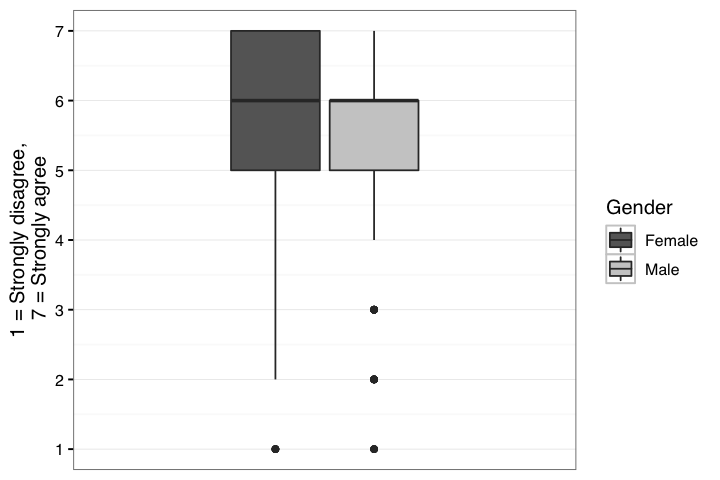

In [10]:
ex5 <- sadness %>% 
  drop_na(ASM25) %>%   # drop missing values 
  ggplot(aes(y = ASM25,fill=gender))+
  geom_boxplot()+
  scale_y_continuous(breaks = seq(1,7,by=1))+
  scale_x_discrete()+
  scale_fill_grey(start = .4,end = .8,name='Gender')+
  ylab('1 = Strongly disagree,\n 7 = Strongly agree')+
  theme_MusicScience()
print(ex5)

### Ch6_Ex06.R
Create a plot with means and confidence intervals.

These examples utilise the confidence interval functions from `Hmisc` package, so let's install that package first. Installing `Hmisc` can take some time (~ 1 minute). 

In [11]:
install.packages("Hmisc") # Install library for confidence interval functions
invisible(library(Hmisc)) # Load library and suppress messages/warnings

Warning message:
“dependency ‘foreign’ is not available”also installing the dependencies ‘deldir’, ‘RcppEigen’, ‘png’, ‘jpeg’, ‘interp’, ‘checkmate’, ‘htmlwidgets’, ‘viridisLite’, ‘survival’, ‘Formula’, ‘latticeExtra’, ‘cluster’, ‘gridExtra’, ‘htmlTable’, ‘viridis’

Warning message in install.packages("Hmisc"):
“installation of package ‘RcppEigen’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘interp’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘latticeExtra’ had non-zero exit status”Warning message in install.packages("Hmisc"):
“installation of package ‘Hmisc’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(Hmisc): there is no package called ‘Hmisc’


In [12]:
ex6 <- sadness %>% 
  drop_na(ASM20) %>%   # drop missing values 
  group_by(gender) %>%
  summarise(mean= mean(ASM20),ci = mean_cl_normal(ASM20)) %>% 
  ggplot(aes(x = gender,y = mean,fill=gender))+
  geom_col(colour='black',show.legend = FALSE)+
  geom_errorbar(aes(ymin=ci$ymin,ymax=ci$ymax),width=0.5)+
  scale_y_continuous(breaks = seq(1,7,by=1), expand = c(0,0))+
  scale_fill_grey(start=.25,end=.75)+
  coord_cartesian(ylim = c(1, 7)) +
  ylab('Mean ± 95% CI')+
  xlab('Gender')+
  theme_MusicScience()
print(ex6)

ERROR: Error: Hmisc package required for this function



### Ch6_Ex07.R

Create four different kinds of visual summaries of the data (density plot, boxplot, histogram overlaid with raw observations, and violin plot with mean and median annotated).


In [ ]:
library(dplyr)

g1 <- MusicScienceData::sadness %>% 
  drop_na(ASM1) %>%   # drop missing values 
  ggplot(aes(x= ASM1,color=gender))+
  geom_density(adjust=1.25)+
  scale_color_grey(name='Gender')+
  scale_x_continuous(breaks = seq(1,7,by=1))+
  ggtitle('ASM 1')+
  ylab('Density')+
  theme_bw()+
  theme(legend.justification=c(1,0), legend.position=c(0.95,0.75))+
  theme(plot.title = element_text(size=11))+
  theme_MusicScience()

tmp <- as_tibble(MusicScienceData::sadness)
tmp2<-tmp[,c(3,7:10)]
dfl <- pivot_longer(tmp2,cols = c(2:5))

g2 <- dfl %>% 
  drop_na(value) %>%   # drop missing values 
  ggplot(aes(x=name,y = value,fill=gender))+
  geom_boxplot(outlier.shape ="")+
  scale_y_continuous(breaks = seq(1,7,by=1))+
  scale_x_discrete()+
  scale_fill_grey(start = .75, end=.25, name="Gender")+
  ggtitle('ASM items 1 to 4')+
  ylab('1 = Strongly disagree, 7 = Strongly agree')+
  xlab('Item')+
  theme_bw()+
  theme(legend.justification=c(1,0), legend.position=c(0.95,0.70))+
  theme_MusicScience()

g3 <- MusicScienceData::sadness %>% 
  drop_na(ASM12) %>%   # drop missing values 
  ggplot(aes(x=1,y = ASM12))+
  geom_boxplot(fill='gray70')+
  geom_jitter(alpha=0.13,colour='black', width = 0.33)+
  ggtitle('ASM 12')+
  scale_y_continuous(breaks = seq(1,7,by=1))+
  scale_x_discrete()+  
  ylab('1 = Strongly disagree, 7 = Strongly agree')+
  xlab('ASM12')+
  theme_MusicScience()

g4 <- MusicScienceData::sadness %>% 
  drop_na(ASM13) %>%   # drop missing values 
  ggplot(aes(x=1,y = ASM13))+
  geom_violin(fill='grey70',adjust=1.2,alpha=0.50)+
  scale_y_continuous(breaks = seq(1,7,by=1))+
  scale_x_discrete()+  
  stat_summary(fun = median, fun.min = median, fun.max = median,
               geom = "crossbar", width = 0.9)+
  stat_summary(fun = mean, fun.min = mean, fun.max = mean,
               geom = "crossbar", width = 0.9,colour='gray50')+
  ggtitle('ASM 13')+
  annotate("text",x=1.6,y=mean(MusicScienceData::sadness$ASM13,na.rm = TRUE),label='Mean',hjust=0,family = "CMU Serif")+
  annotate("text",x=1.6,y=median(MusicScienceData::sadness$ASM13,na.rm = TRUE),label='Median',hjust=0,family = "CMU Serif")+
  ylab('1 = Strongly disagree, 7 = Strongly agree')+
  xlab('ASM13')+
  theme_MusicScience()

ex7 <- plot_grid(g1,g2,g3,g4,labels = "AUTO",ncol = 2, nrow = 2)
print(ex7)


### Ch6_Ex08.R
Means and confidence intervals of survey answers to the question ASM20 across men and women.

In [ ]:
ex8 <- MusicScienceData::sadness %>% 
  drop_na(ASM20) %>%   # drop missing values 
  group_by(gender) %>%
  summarise(mean= mean(ASM20),ci = mean_cl_normal(ASM20)) %>%
  ggplot(aes(x = gender,y = mean,fill=gender))+
  geom_col(colour='black',show.legend = FALSE)+
  geom_errorbar(aes(ymin=ci$ymin,ymax=ci$ymax),width=0.5)+
  scale_y_continuous(breaks = seq(1,7,by=1), expand = c(0,0))+
  scale_fill_grey(start=.25,end=.75)+
  coord_cartesian(ylim = c(1, 7)) +
  ggtitle(MusicScienceData::sadness_ASM_labels[20])+
  ylab('Mean')+
  xlab('Gender')+
  theme_MusicScience()
print(ex8)

### Ch6_Ex09.R
Means and confidence intervals for the question ASM6 across musical expertise.

In [ ]:
tmp <- MusicScienceData::sadness

# relabel the expertise levels to have a nicer plot
tmp$expert<-factor(tmp$expert)
tmp$expert<-factor(tmp$expert,levels=c('Amat.','MusicL','NM','Pro','Semi-pro'),labels=c('Nonmusician','Music-lover','Amateur musician','Semi-pro musician','Professional musician'))

options(repr.plot.width = 8, repr.plot.height = 4)
ex9 <- tmp %>% 
  drop_na(ASM6) %>%   # drop missing values 
  ggplot(aes(x = expert, y = ASM6)) +
  stat_summary(fun = "mean", geom = "bar", alpha = .7) +
  stat_summary(fun = "mean", geom = "point", 
               size = 1) +
  stat_summary(fun.data = "mean_cl_normal",
               geom = "errorbar",
               width = .5) +
  ylab('Mean Rating ± 95% CI')+
  ggtitle(MusicScienceData::sadness_ASM_labels[6])+
  scale_x_discrete(labels=function(x){sub("\\s", "\n", x)},name="Musical Expertise")+
  coord_cartesian(ylim = c(1, 7)) +
  scale_y_continuous(breaks = 1:7, expand = c(0,0))+
  theme_MusicScience()
print(ex9)

## Ch06_Ex10.R
Create a table of counts (N), Means, and confidence intervals for the question ASM20 across a factor (Gender).

In [ ]:
table1 <- tmp %>%
  drop_na(ASM20) %>%   # drop missing values 
  group_by(gender) %>%
  summarise(n=n(),mean_cl_normal(ASM20))
colnames(table1)<-c('Gender','N','M','95% CI LL','95% CI UL')
knitr::kable(table1,digits = 2)  

The same as a barplot with confidence intervals.

In [ ]:
g1 <- MusicScienceData::sadness %>% 
  drop_na(ASM20) %>%   # drop missing values 
  group_by(gender) %>%
  summarise(mean= mean(ASM20),ci = mean_cl_normal(ASM20)) %>%
  ggplot(aes(x = gender,y = mean,fill=gender))+
  geom_col(colour='black',show.legend = FALSE)+
  geom_errorbar(aes(ymin=ci$ymin,ymax=ci$ymax),width=0.5)+
  scale_y_continuous(breaks = seq(1,7,by=1), expand = c(0,0))+
  scale_fill_grey(start=.25,end=.75)+
  coord_cartesian(ylim = c(1, 7)) +
  ggtitle(MusicScienceData::sadness_ASM_labels[20])+
  ylab('Mean')+
  xlab('Gender')+
  theme_MusicScience()
g1


## Ch6_Ex11.R
Scatter plot example with an existing data.

Warning message:
“Removed 5 rows containing missing values (geom_smooth).”

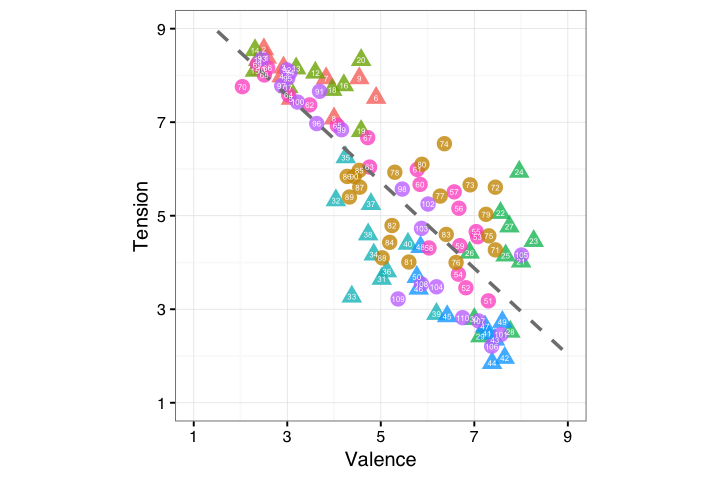

In [14]:
ex10 <- ggplot(soundtrack) +
  aes(x = Valence, y = Tension, colour = TARGET_EMOTION,
      label=Number,
      shape= TARGET_FRAMEWORK) +
  geom_point(size=4,alpha=0.80,show.legend=FALSE) +
  coord_fixed(ratio = 1)+
  geom_smooth(aes(shape = NULL,colour=NULL),method="lm", 
              formula='y ~x',se=FALSE, fullrange=TRUE, 
              level=0.95, colour='grey50',
              linetype='dashed',show.legend = FALSE)+
  geom_text(show.legend=FALSE,color='white',size=1.7)+
  #scale_colour_grey(name='Emotion',start = .6,end = 0)+  
  scale_shape(name='Framework')+  
  scale_x_continuous(breaks=seq(1,9,by=2),limits=c(1,9))+
  scale_y_continuous(breaks=seq(1,9,by=2),limits=c(1,9))+
  theme_MusicScience()
print(ex10)

## References

* Armitage, J. & Eerola, T. (2020). Reaction Time Data in Music Cognition: A Comparison of Pilot Data Sets from Lab, Crowdsourced and Convenience Web Samples. _Frontiers in Psychology_. https://doi.org/10.3389/fpsyg.2019.02883

* Eerola, T. & Peltola, H.-R. (2016). Memorable Experiences with Sad Music: Reasons, Reactions and Mechanisms of Three Types of Experiences. _PlosOne, 11(6)_, e0157444. http://dx.doi.org/10.1371/journal.pone.0157444

* Eerola, T. & Vuoskoski, J. K. (2011). A comparison of the discrete and dimensional models of emotion in music. _Psychology of Music, 39(1)_, 18-49. https://doi.org/10.1177/0305735610362821

---
[Back to Index](https://github.com/tuomaseerola/emr)
